In [1]:
import pandas as pd
import numpy as np
import plotly
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Importing the news data

In [2]:
news_data = pd.read_csv('./dataset/news.tsv', header=None, sep='\t')
news_data.columns = ["News ID",
                    "Category",
                    "SubCategory",
                    "Title",
                    "Abstract",
                    "URL",
                    "Title Entities",
                    "Abstract Entities"] 
# news_data=news_data.iloc[:,:5]
news_data.dropna(inplace=True)
news_data.reset_index(drop=True,inplace=True)

# Importing the behaviors data

In [3]:
behaviors_data = pd.read_csv('./dataset/behaviors.tsv', header=None, sep='\t')
behaviors_data.columns = ["Impression ID",
                    "User ID",
                    "Time",
                    "History",
                    "Impressions"]
behaviors_data.dropna(inplace=True)
behaviors_data.reset_index(drop=True,inplace=True)

In [4]:
# count the number of history of each user
len_history = []
for i in range(len(behaviors_data)):
    len_history.append(len(behaviors_data['History'][i].split(' ')))
behaviors_data['Number of history'] = len_history

In [5]:
# Category and Sub Category in history
category_history = []
sub_category_history = []
for i in range(len(behaviors_data)):
    history_list = behaviors_data['History'][i].split(' ')
    temp = ' '.join(news_data[news_data['News ID'].isin(history_list)]['Category'])
    category_history.append(temp)
    if i%10000==0:
        print(i)

behaviors_data['History category']=category_history

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000


In [6]:
# Time category
time = list()
for i in range(len(behaviors_data)):
    hour = int(behaviors_data['Time'][i].split(' ')[1].split(':')[0])
    ap = behaviors_data['Time'][i].split(' ')[2]
    if 6 <= hour < 12 and ap == 'AM': # Morning
        t = 'Morning'
    if 0 <= hour < 6 and ap == 'PM': # Afternoon
        t = 'Afternoon'
    if 6 <= hour < 12 and ap == 'PM': # Evening
        t = 'Evening'
    if 0 <= hour < 6 and ap == 'AM': # Night
        t = 'Night' 
    time.append(t)
behaviors_data['Time category'] = time

In [7]:
# Impression rate
impressions = dict()
for i in range(len(behaviors_data)):
    user_id = behaviors_data['User ID'][i]
    temp = ('-'.join(behaviors_data['Impressions'][i].split(' '))).split('-')[1::2]
    i_list = list(map(int, temp))
    if user_id in impressions.keys():
        impressions[user_id] = impressions[user_id] + i_list
    else:
        impressions[user_id] = i_list
        
impressions_rate = list()
for i in range(len(behaviors_data)):
    user_id = behaviors_data['User ID'][i]
    impressions_rate.append(sum(impressions[user_id])/len(impressions[user_id]))
behaviors_data['Impressions_rate'] = impressions_rate

## Popularity of news topics

In [10]:
import json
list_topics = list()
news_topics_df = pd.DataFrame(columns=['News ID','Topic'])
news_topics_df['News ID'] = news_data['News ID']

for i in range(len(news_data)):
    string_list = list()
    string = ''
    if len(news_data['Title Entities'][i]) < 4:
        topic = ''
    else:
        for char in news_data['Title Entities'][i].strip('[]'):
            if char == '':
                break
            elif char == '{':
                continue
            elif char == '}':
                string_list.append(string)
                break
            else:
                string = string + str(char)
        string_dict = '{' + string_list[0] + '}'
        topic = json.loads(string_dict)['Label']
    news_topics_df['Topic'][i] = topic
    if i%10000==0:
        print(i)
news_topics_df = news_topics_df.set_index('News ID')

0
10000
20000
30000
40000


### Based in all news collection

Wordcloud1...


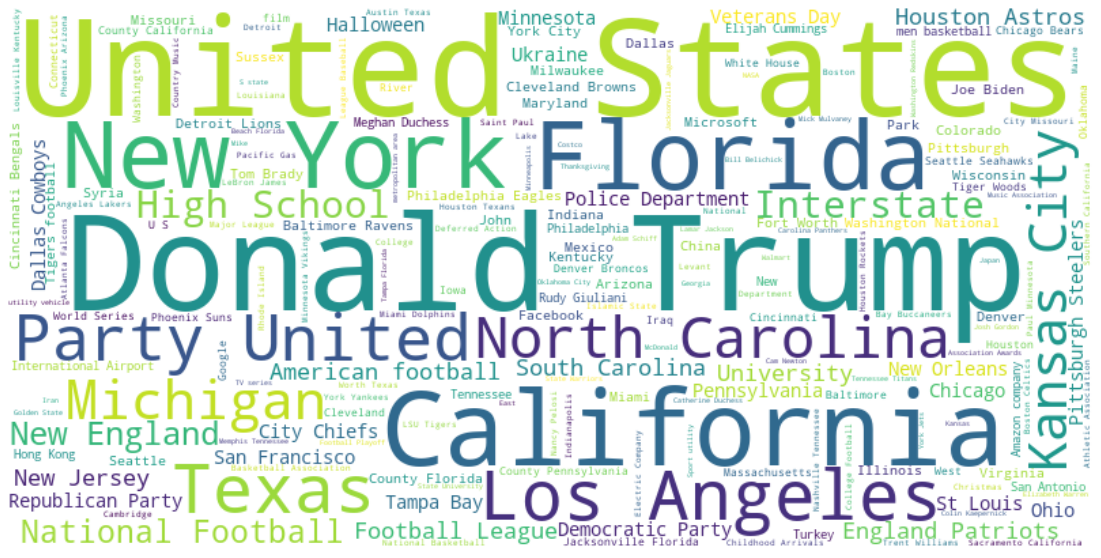

In [13]:
print('Wordcloud1...')
text = ' '
for i in news_topics_df['Topic']:
    text = text + i + ' '
# Make the figure
wordcloud = WordCloud(background_color='white',width=800, height=400).generate(text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Based on users' history

Wordcloud2...
33195
0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000


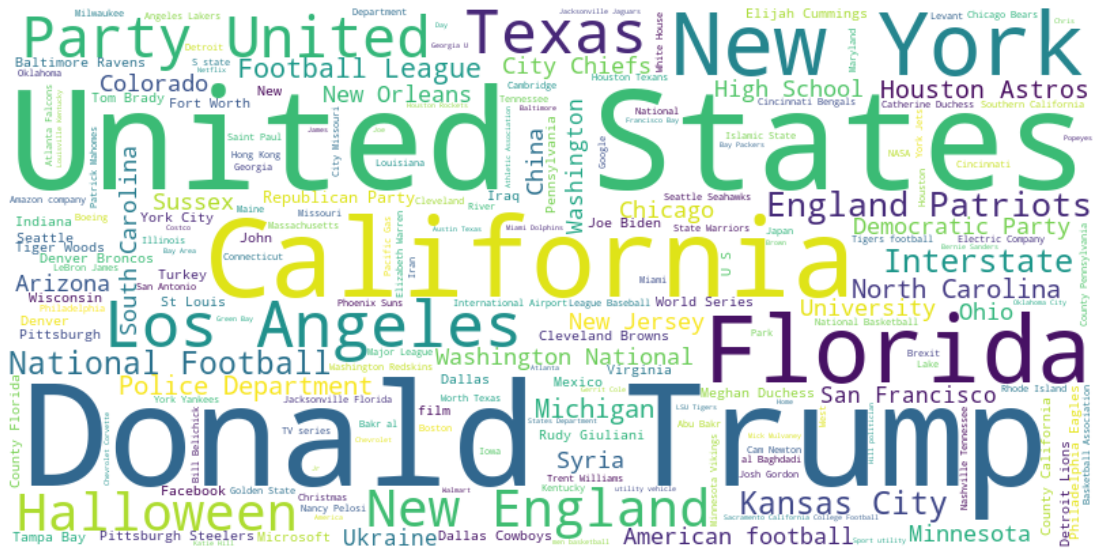

In [16]:
print('Wordcloud2...')
hist = list()
for i_h in range(len(behaviors_data)):
    h_list = behaviors_data['History'][i_h].split()
    for h in h_list:
        hist.append(h)
        
topics = ''
i = 0
print(len(set(hist)))
for each_h in set(hist):
    string_temp = ''
    if each_h in news_topics_df.index:
        if len(str(news_topics_df['Topic'][str(each_h)])) > 0:
            string_temp = str(news_topics_df['Topic'][str(each_h)])
            for c in range(1, hist.count(string_temp)):
                string_temp = string_temp + ' ' + string_temp
            topics = topics + string_temp + ' '
    if i%1000==0:
        print(i)
    i = i+1
# Make the figure
wordcloud = WordCloud(background_color="white",width=800, height=400).generate(topics)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Popularity of news category among users

In [17]:
hist_cat = list()
for i_hc in range(len(behaviors_data)):
    hc_list = behaviors_data['History category'][i_hc].split()
    for hc in hc_list:
        hist_cat.append(hc)

popularity = dict()
for s in set(hist_cat):
    popularity[s] = hist_cat.count(s)

pop_df = pd.DataFrame(columns=['Category','Count'])
pop_df['Category'] = list(popularity.keys())
pop_df['Count'] = list(popularity.values())
pop_df = pop_df.sort_values(by='Count')

In [18]:
c = news_data['Category'].value_counts()
df = pd.DataFrame(columns=['Category', 'Count'])
df['Category'] = c.index
df['Count'] = c.values
df = df.sort_values(by='Count', ascending=True)

### Based on all news collection

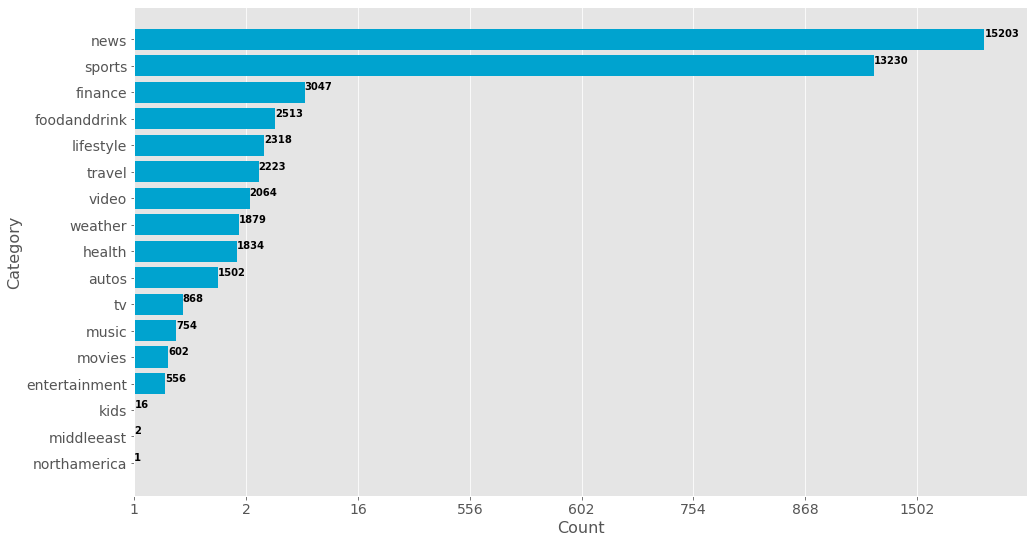

In [27]:
plt.style.use('ggplot')
fig6, ax6 = plt.subplots(figsize =(16, 9))
ax6.barh(df['Category'], df['Count'], color='#00a3cf')
ax6.grid(axis='y')
# Add annotation to bars 
for i in ax6.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='black',) 
ax6.set_ylabel('Category',fontdict=dict(fontsize=16))
ax6.set_xlabel('Count',fontdict=dict(fontsize=16))

ax6.set_xticklabels(df['Count'], rotation=0, fontsize=14)
ax6.set_yticklabels(df['Category'], rotation=0, fontsize=14)

plt.show()

### Based on users' history

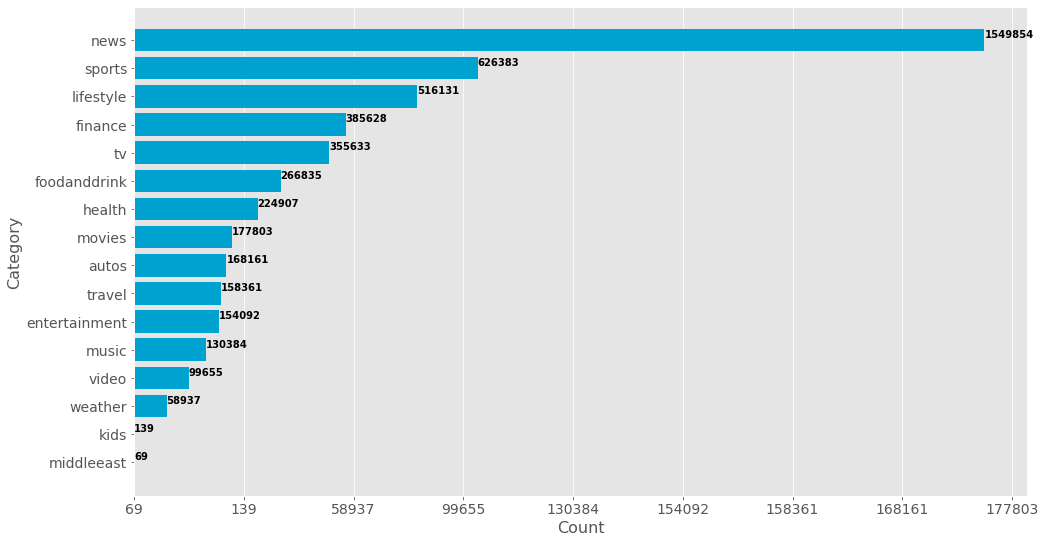

In [29]:
plt.style.use('ggplot')
fig4, ax4 = plt.subplots(figsize =(16, 9))
ax4.barh(pop_df['Category'], pop_df['Count'], color='#00a3cf')
ax4.grid(axis='y')
# Add annotation to bars 
for i in ax4.patches: 
    plt.text(i.get_width()+0.2, i.get_y()+0.5,  
             str(round((i.get_width()), 2)), 
             fontsize = 10, fontweight ='bold', 
             color ='black',) 
ax4.set_ylabel('Category',fontdict=dict(fontsize=16))
ax4.set_xlabel('Count',fontdict=dict(fontsize=16))
ax4.set_xticklabels(pop_df['Count'], rotation=0, fontsize=14)
ax4.set_yticklabels(pop_df['Category'], rotation=0, fontsize=14)

plt.show()

## Timing preferences for reading news

In [30]:
count_time = behaviors_data['Time category'].value_counts()

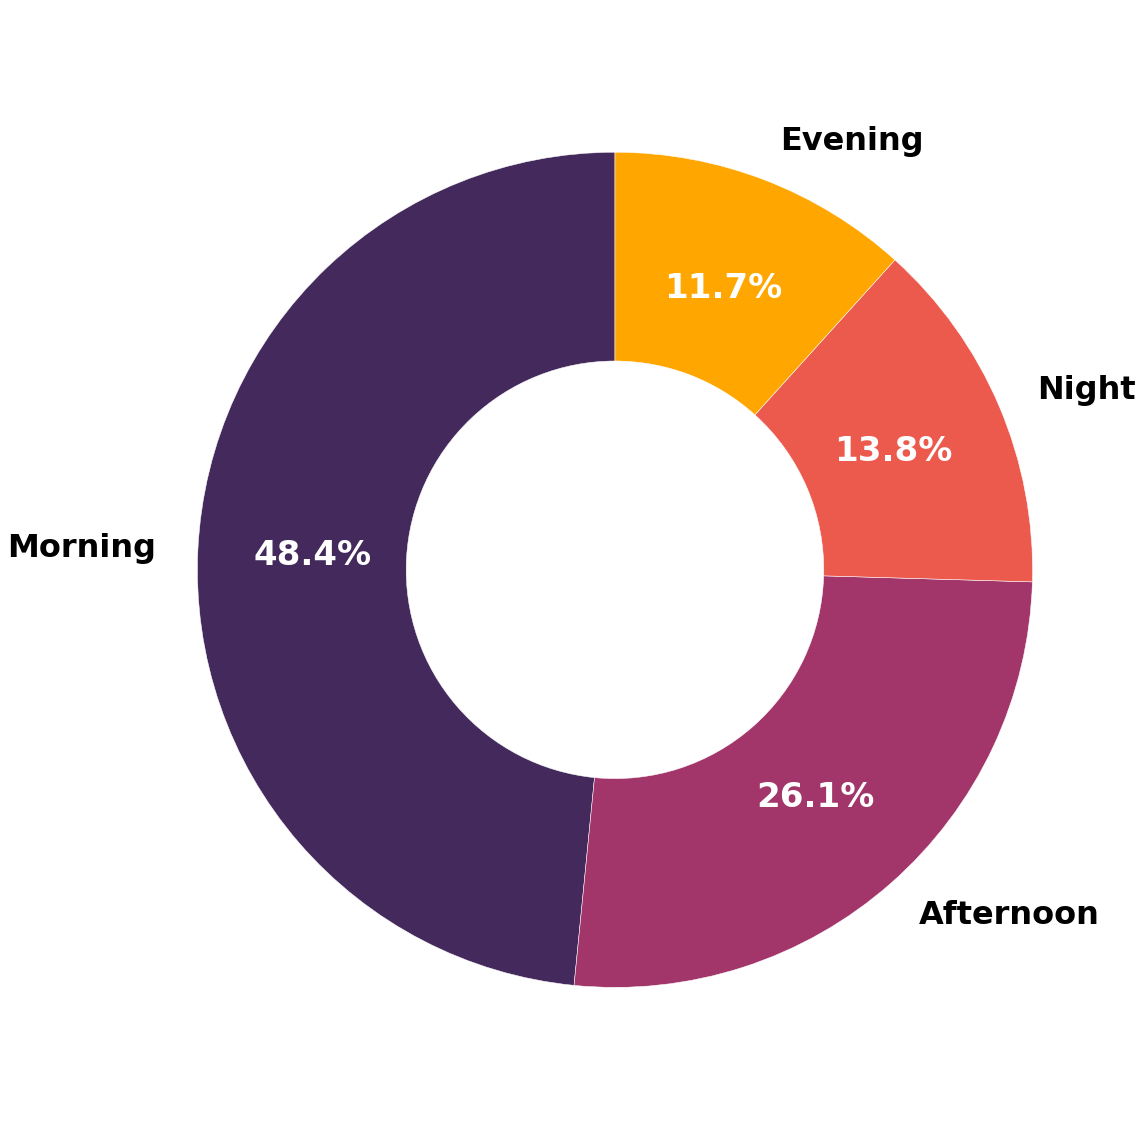

In [31]:
colors = ['#442a5c','#a2356a','#ec5a4e','#ffa600']
fig1, ax1 = plt.subplots(figsize =(16,16))
_ , texts, autotexts = ax1.pie(count_time.values, labels=count_time.index, colors=colors, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5, edgecolor='w'), pctdistance=0.725)
plt.setp(autotexts, size=34, weight="bold", color='w')
plt.setp(texts, size=32, weight='bold')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')
plt.tight_layout()
plt.show()

## The distribution of history count among users

In [32]:
hist_count = behaviors_data['Number of history'].value_counts()
histcount_df = pd.DataFrame(columns=['Num of history', 'Count'])
histcount_df['Num of history'] = hist_count.index
histcount_df['Count'] = hist_count.values
median = behaviors_data['Number of history'].median()

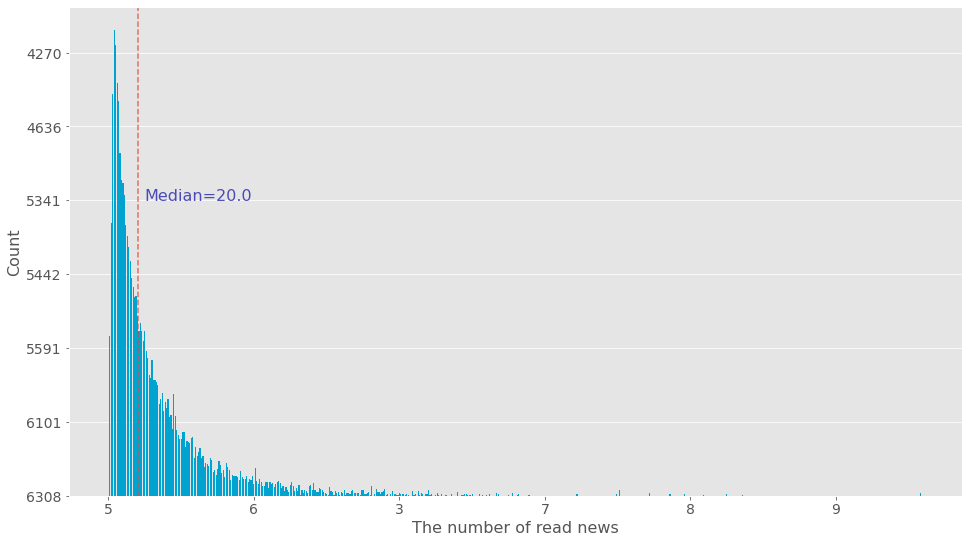

In [37]:
fig5, ax5 = plt.subplots(figsize = (16,9))
ax5.bar(x=histcount_df['Num of history'], height=histcount_df['Count'],color='#00a3cf')
ax5.grid(axis='x')  
ax5.set_ylabel('Count',fontdict=dict(fontsize=16))
ax5.set_xlabel('The number of read news',fontdict=dict(fontsize=16))
# Annotate
x_line_annotation = median
x_text_annotation = median + 5
ax5.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.75)
ax5.text(x=x_text_annotation, y=4000, s='Median='+str(median), alpha=0.75, color='#1816a7', fontdict=dict(fontsize=16))
ax5.set_xticklabels(histcount_df['Num of history'], rotation=0, fontsize=14)
ax5.set_yticklabels(histcount_df['Count'], rotation=0, fontsize=14)
plt.show()